In [188]:
from music21 import *
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

In [189]:
random.seed(42)

In [190]:
def create_ca1D(length, init, rules):
    ncells = len(init)
    array = [[0] * ncells for _ in range(length)]
    array[0] = init

    for i in range(1, length):
        for j in range(ncells):
            if j != (ncells - 1) and j != (ncells - 2):
                ca_at = (array[i-1][j-2], array[i-1][j-1], array[i-1][j], array[i-1][j+1], array[i-1][j+2])
            elif j == ncells - 2:
                ca_at = (array[i-1][j-2], array[i-1][j-1], array[i-1][j], array[i-1][j+1], array[i-1][0])
            elif j == ncells - 1:
                ca_at = (array[i-1][j-2], array[i-1][j-1], array[i-1][j], array[i-1][0], array[i-1][1])
            if ca_at in rules:
                array[i][j] = 1
        array[i][np.random.randint(trimlimits1[0], trimlimits1[1])] = 1
        array[i][np.random.randint(trimlimits1[0] - 4, trimlimits1[1] + 4)] = 0

        if i % 50 == 0:
            for j in range(trimlimits1[0], trimlimits1[1] + 1):
                array[i][j] = np.random.randint(0,2)

            
    return(array)

In [191]:
def strip_ca1D(array, limits):
    trim_indices = list(range(limits[0], limits[1]))
    array_trim = []
    for i in range(len(array)):
        trim_i = []
        for j in trim_indices:
            trim_i.append(array[i][j])
        array_trim.append(trim_i)
    return(array_trim)

In [192]:
def ca1D_to_stream(array, notes, durations, key_ = None):
    nevents = len(array)
    ncells = len(array[0])
    durations_iterator = itertools.cycle(durations)

    stream_ca = stream.Stream()
    if key_ is not None:
        stream_ca.keySignature = key.Key(key_)

    for i in range(nevents):
        notes_i = []
        duration_i = next(durations_iterator)
        for j in range(ncells):
            if array[i][j] == 1:
                notes_i.append(notes[j])
        if len(notes_i) == 0:
            stream_ca.append(note.Rest(quarterLength = duration_i))
        elif len(notes_i) == 1:
            stream_ca.append(note.Note(notes_i[0], quarterLength = duration_i))
        else:
            stream_ca.append(chord.Chord(notes_i, quarterLength = duration_i))
    return(stream_ca)

In [193]:
def chords_to_notes(stream_, select = 'lowest'):
    chordless = stream.Stream()
    for i in stream_.iter().notesAndRests:
        if type(i) == type(chord.Chord()):
            if select == 'highest':
                n = i.notes[-1]
            elif select == 'lowest':
                n = i.notes[0]
            elif select == 'random':
                n = random.sample(i.notes, k = 1)
            else:
                print("select must be 'high', 'low' or 'random'")
        else:
            n = i
        chordless.append(n)
    return(chordless)


In [194]:
ca1D_rules = dict({
    '018': [(1, 0, 0), (0, 0, 1)],
    '022': [(1, 0, 0), (0, 1, 0), (0, 0, 1)], 
    '030': [(1, 0, 0), (0, 1, 1), (0, 1, 0), (0, 0, 1)],
    '045': [(1, 0, 1), (0, 1, 1), (0, 1, 0), (0, 0, 0)],
    '054': [(1, 0, 1), (1, 0, 0), (0, 1, 0), (0, 0, 1)],
    '060': [(1, 0, 1), (1, 0, 0), (0, 1, 1), (0, 1, 0)],
    '073': [(1, 1, 0), (0, 1, 1), (0, 0, 0)],
    '102': [(1, 1, 0), (1, 0, 1), (0, 1, 0), (0, 0, 1)],
    '105': [(1, 1, 0), (1, 0, 1), (0, 1, 1), (0, 0, 0)],
    '110': [(1, 1, 0), (1, 0, 1), (0, 1, 1), (0, 1, 0), (0, 0, 1)],
    '126': [(1, 1, 0), (1, 0, 1), (1, 0, 0), (0, 1, 1), (0, 1, 0), (0, 0, 1)],
    '150': [(1, 1, 1), (1, 0, 0), (0, 1, 0), (0, 0, 1)],
    '2959090333': [(1, 1, 1, 1, 1), (1, 1, 1, 0, 1), (1, 1, 1, 0, 0), (1, 0, 1, 1, 0), (1, 0, 1, 0, 1), (0, 1, 1, 0, 1), (0, 1, 0, 0, 1), (0, 0, 1, 1, 1), (0, 0, 1, 0, 0), (0, 0, 0, 1, 1), (0, 0, 0, 1, 0), (0, 0, 0, 0, 0)]
})

In [195]:
width = 50
length = 24
init = [0] * width
init[width // 2] = 1

# fig, axes = plt.subplots(2, 6, figsize = (10, 5))
# fig.subplots_adjust(hspace=0.5)
# axes = axes.flatten()
# for i, rule in enumerate(ca1D_rules.keys()):
#     ca_i = create_ca1D(length, init, ca1D_rules[rule])
#     axes[i].matshow(np.array(ca_i).transpose(), cmap ="binary")
#     axes[i].invert_yaxis()
#     axes[i].set_title('rule ' + rule)
#     axes[i].axis('off')

Text(2, 58, 'Bass')

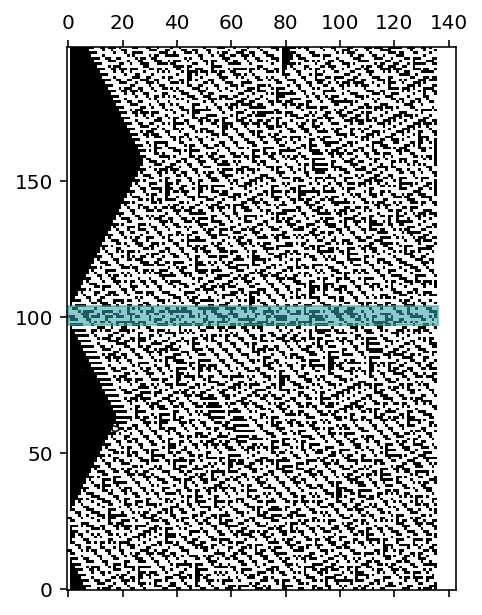

In [196]:
ca1_rule = ca1D_rules['2959090333']
width1 = 200
length1 = 136
init = [0] * width1
init[width1 // 2] = 1
init[np.random.randint(0, width)] = 1
init[np.random.randint(0, width)] = 1
trimlimits1 = [
    width1//2 - 3, width1//2 + 4,
]
ca1 = create_ca1D(length1, init, ca1_rule)

fig, ax = plt.subplots(figsize = (5, 5))
ax.matshow(np.array(ca1).transpose(), cmap ="binary")
ax.invert_yaxis()
ax.tick_params(axis='both', labelsize=10)


rect = plt.Rectangle(
    (0, trimlimits1[0]),
    width = length1,
    height = trimlimits1[1] - trimlimits1[0],
    color = '#38A0A790'
)
ax.add_patch(rect)

ax.arrow(x=5, y=65, dx=0, dy=15, width=0.5) 

ax.text(2, 58, "Bass", fontsize=10)

In [197]:
array1_trim = strip_ca1D(ca1, limits = trimlimits1)

<Figure size 864x360 with 0 Axes>

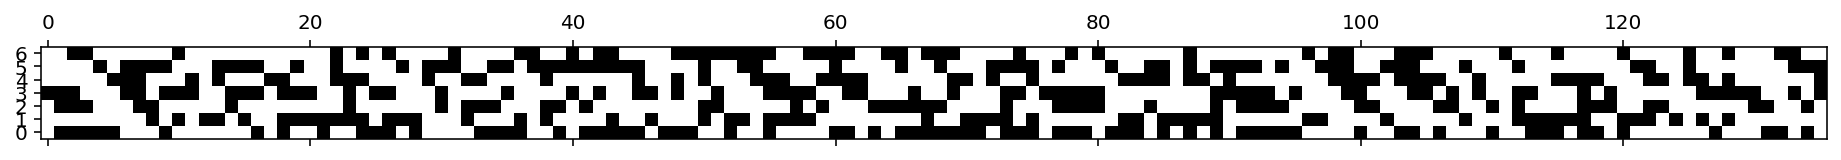

In [198]:
arrays_trim = [array1_trim]
plt.figure(figsize=(12, 5))
plt.matshow(np.array(array1_trim).transpose(), cmap ="binary")
plt.gca().invert_yaxis()
plt.show()

In [199]:
track1 = ca1D_to_stream(
    array = array1_trim,
    notes = ['C4', 'D4', 'Eb4', 'F4', 'G4', 'Ab4', 'Bb4'],
    durations = [0.5, 0.5, 1, 2, 1, 1, 0.5, 1.5]
)


In [200]:
piece = stream.Stream()
piece.insert(track1)
piece.show('midi')
piece.write('midi', 'ceullular.midi')
pass